## Follwoing are the steps followed in gradient boosting regression problem


1.   Build first model whci is mean of output column then calculate the residulas (actual - y_pred1)
2.   Build second model which is decision tree with 8 to 32 leaf node and predict the residuls of the first model and prediction for second model id y_pred2 = m1 + Learning_rate * m2_pred
3.   similary we can add model and predict for other model also



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [4]:

df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


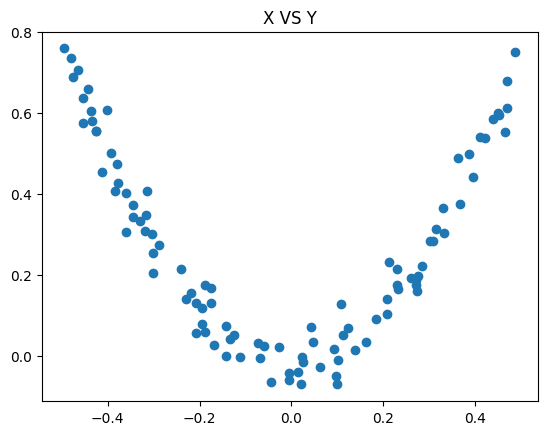

In [7]:
plt.scatter(df['X'],df['y'])
plt.title("X VS Y")
plt.show()

In [8]:
df['y_pred'] = df['y'].mean()

In [11]:
df.head()

,X,y,y_pred,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


In [10]:
# calculate residulas 1
df['res1'] = df['y'] - df['y_pred']

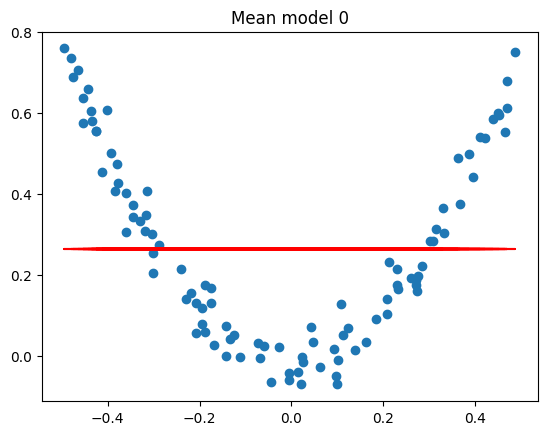

In [15]:
# plot the first decision line
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['y_pred'],c = 'red')
plt.title('Mean model 0')
plt.show()

In [16]:
# now train the model on the residual of the model 0 and predict the output
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [18]:
dt1.fit(df['X'].values.reshape(100,1),df['res1'])

DecisionTreeRegressor(max_leaf_nodes=8)

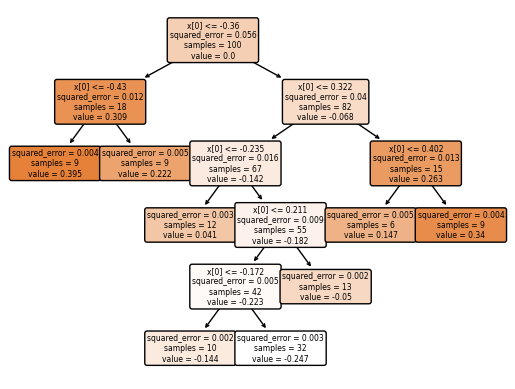

In [23]:
from sklearn.tree import plot_tree
plot_tree(dt1 ,filled = True , rounded = True)
plt.show()

In [25]:

# genrating test cases
X_test = np.linspace(-0.5,0.5,500)

In [29]:
y_pred2 = 0.265458 + dt1.predict(X_test.reshape(500,1))

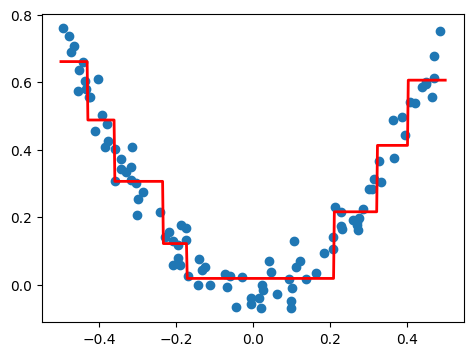

In [31]:
plt.figure(figsize =(12,4))
plt.subplot(121)
plt.plot(X_test,y_pred2,linewidth = 2 , c ='red')
plt.scatter(df['X'],df['y'])
plt.show()

In [33]:
df['y_pred1'] = 0.265458 + dt1.predict(df['X'].values.reshape(100,1))

In [34]:
df.head()

,X,y,y_pred,res1,y_pred1
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964


In [36]:
# caclulate the resudual 2 for model 3

df['res2'] = df['y'] - df['y_pred1']

In [37]:
df.head()

,X,y,y_pred,res1,y_pred1,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


In [38]:
# now again create the model 3 for the prediction
dt2 = DecisionTreeRegressor(max_leaf_nodes= 8)

dt2.fit(df['X'].values.reshape(100,1),df['res2'])

DecisionTreeRegressor(max_leaf_nodes=8)

In [39]:
df['y_pred2'] = 0.265458 + df['y_pred1'] + dt2.predict(df['X'].values.reshape(100,1))

In [42]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [dt1,dt2])

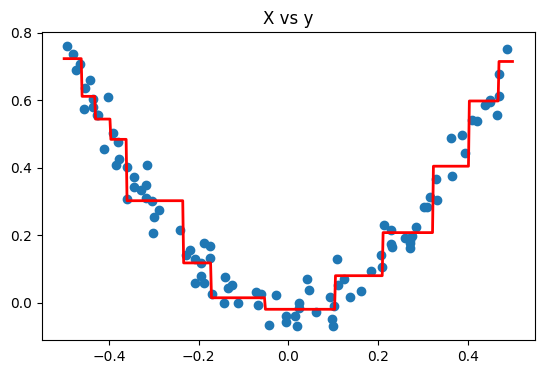

In [44]:

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')
plt.show()

In [45]:

def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


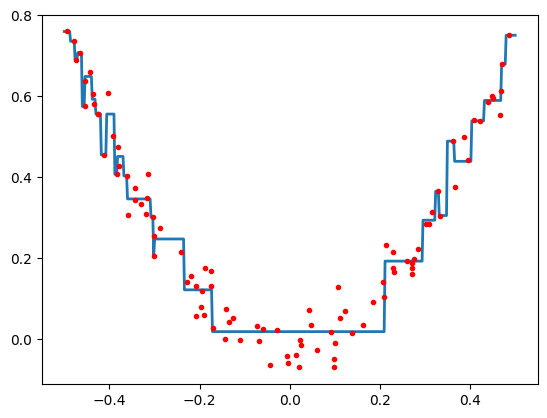

4


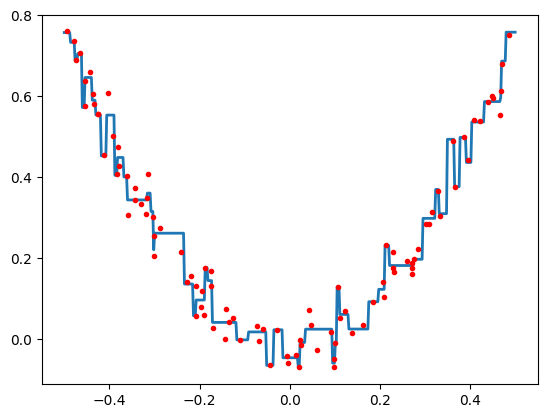

3


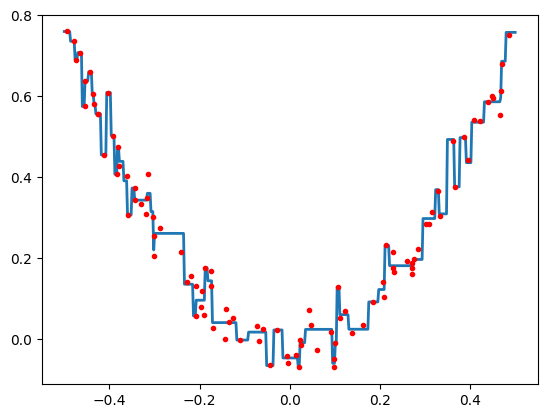

2


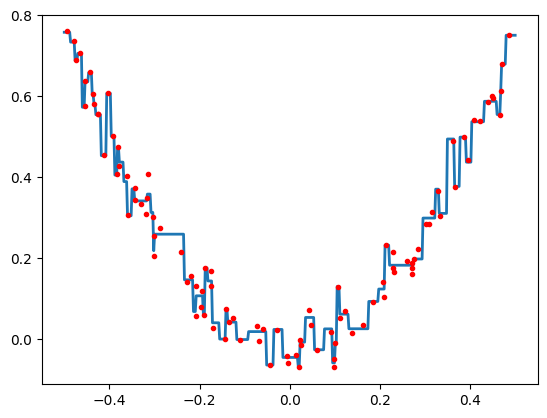

1


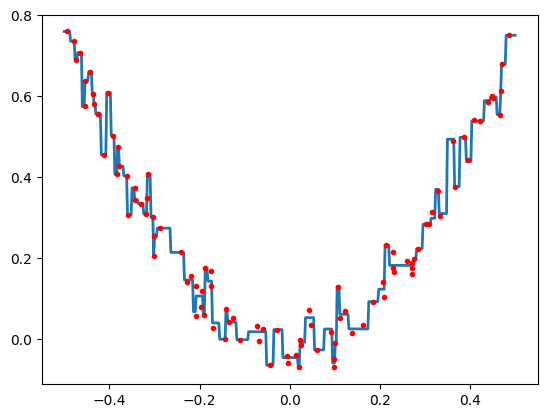

In [46]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)
